In [58]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/ev-charging-stations-india.csv')


In [59]:
print(df.head())
print(df.info())
print(df.describe())


                                                name          state      city  \
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

                                             address lattitude  longitude  \
0  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...   29.6019  -0.359169   
1  DLF Phase IV, Sector 28, Gurugram, Haryana 122022   28.4673  -0.359169   
2  Jaipur to Delhi Road, Behror Midway, Behror, R...   27.8751  -0.359169   
3  Fun and Food Carnival, NH 58, Khatauli Bypass,...   29.3105  -0.359169   
4  NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...   29.3105  -0.359169   

       type  
0 -0.114391  
1 -0.114391  
2 -0.114

In [60]:
print(df.columns)

Index(['name', 'state', 'city', 'address', 'lattitude', 'longitude', 'type'], dtype='object')


<ipython-input-61-18378cb5469d>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




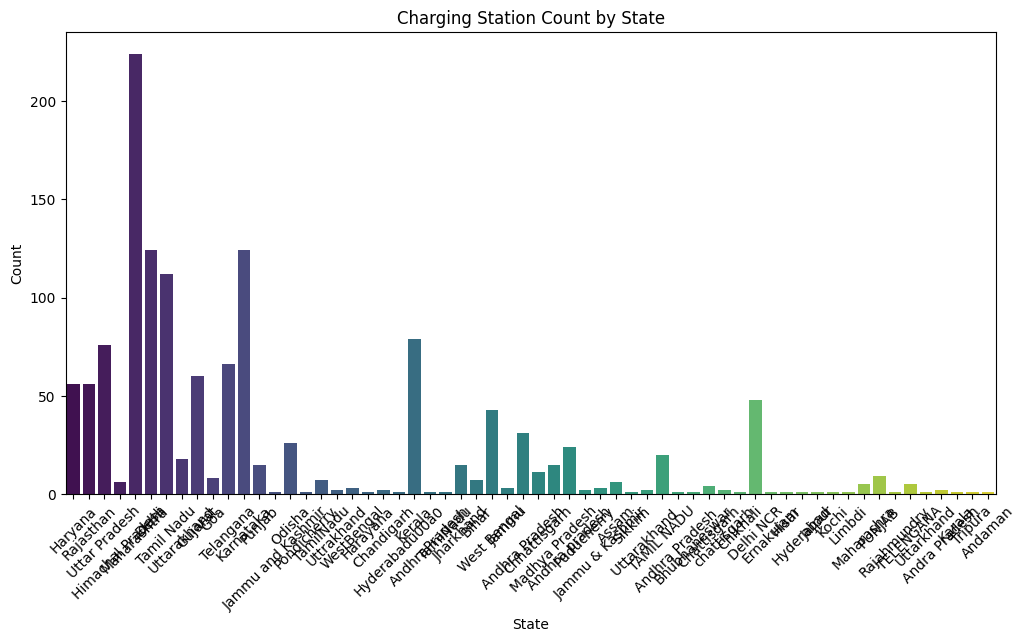

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state', palette='viridis')
plt.title('Charging Station Count by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


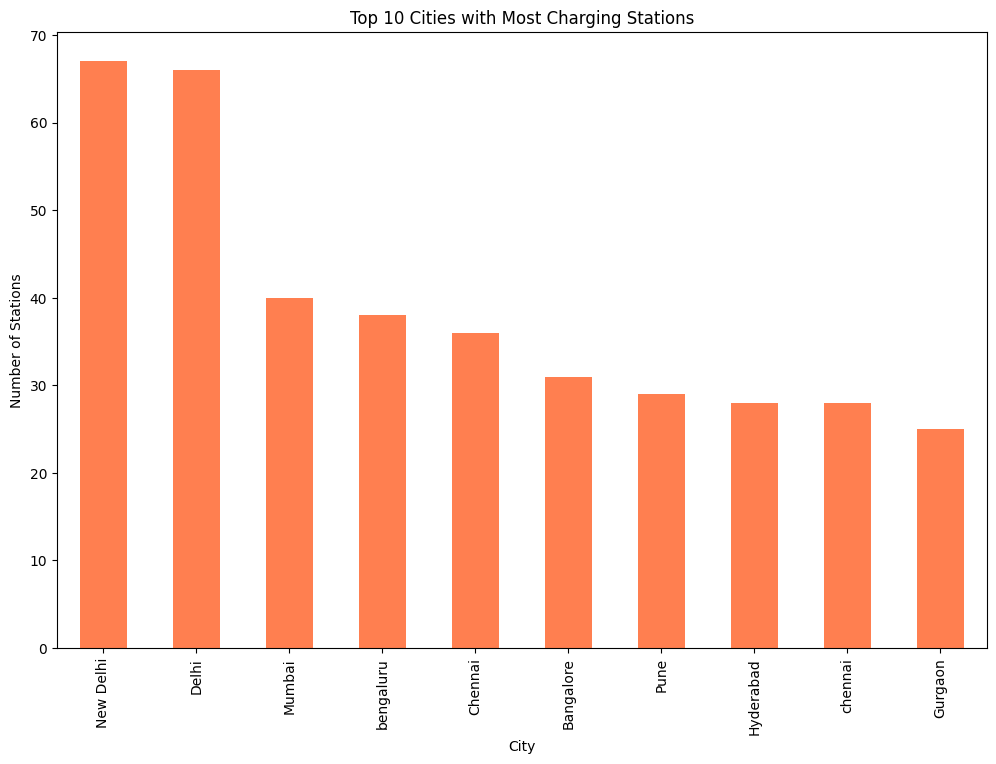

In [62]:
top_cities = df['city'].value_counts().head(10)
plt.figure(figsize=(12, 8))
top_cities.plot(kind='bar', color='coral')
plt.title('Top 10 Cities with Most Charging Stations')
plt.xlabel('City')
plt.ylabel('Number of Stations')
plt.show()


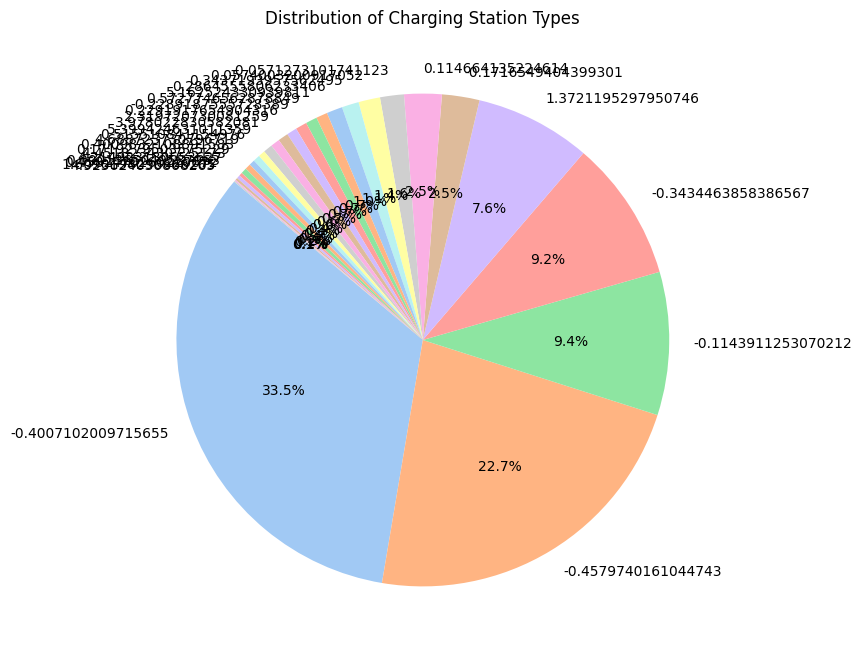

In [63]:
station_type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 8))
station_type_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Charging Station Types')
plt.ylabel('')
plt.show()


In [64]:
print(df['longitude'].unique())


[-0.35916914 -0.35916914 -0.35916915 ...  2.73870785  2.65182891
  2.65039279]


In [65]:
df['longitude'] = df['longitude'] * 10

print(df[['lattitude', 'longitude']].describe())


          longitude
count  1.342000e+03
mean   3.388579e-16
std    1.000373e+01
min   -3.591703e+00
25%   -3.591692e+00
50%   -3.591691e+00
75%   -3.591691e+00
max    3.369165e+01


In [66]:
df['longitude'] = df['longitude'] * 10

print(df[['lattitude', 'longitude']].describe())


          longitude
count  1.342000e+03
mean  -5.421727e-15
std    1.000373e+02
min   -3.591703e+01
25%   -3.591692e+01
50%   -3.591691e+01
75%   -3.591691e+01
max    3.369165e+02


In [67]:
df.rename(columns={'lattitude': 'latitude'}, inplace=True)


In [68]:
print(df['latitude'].head(20))
print(df['longitude'].head(20))


0     29.6019
1     28.4673
2     27.8751
3     29.3105
4     29.3105
5     31.4668
6      30.879
7      30.879
8     29.7379
9     29.7379
10    29.6019
11    28.3861
12     18.538
13    28.5248
14    11.3217
15      11.33
16    28.5682
17     28.566
18     28.456
19    18.7876
Name: latitude, dtype: object
0    -35.916914
1    -35.916914
2    -35.916915
3    -35.916913
4    -35.916913
5    -35.916915
6    -35.916914
7    -35.916914
8    -35.916914
9    -35.916914
10   -35.916914
11   -35.916914
12   -35.916919
13   -35.916914
14   -35.916914
15   -35.916914
16   -35.916913
17   -35.916913
18   -35.916914
19   -35.916920
Name: longitude, dtype: float64


In [69]:
df['latitude'] = df['latitude'].astype(str).str.extract(r'([-+]?\d*\.\d+|\d+)')[0]
df['longitude'] = df['longitude'].astype(str).str.extract(r'([-+]?\d*\.\d+|\d+)')[0]

df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df = df.dropna(subset=['latitude', 'longitude'])


In [70]:
print(df[['latitude', 'longitude']].head())
print(df[['latitude', 'longitude']].describe())


   latitude  longitude
0   29.6019 -35.916914
1   28.4673 -35.916914
2   27.8751 -35.916915
3   29.3105 -35.916913
4   29.3105 -35.916913
          latitude     longitude
count  1342.000000  1.342000e+03
mean     20.058514 -5.421727e-15
std       7.110135  1.000373e+02
min       8.390198 -3.591703e+01
25%      13.041991 -3.591692e+01
50%      19.080760 -3.591691e+01
75%      27.832697 -3.591691e+01
max      78.065400  3.369165e+02


In [71]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="name",
                        hover_data=["city", "state", "type"],
                        color_discrete_sequence=["blue"], zoom=4, height=600)

fig.update_layout(mapbox_style="open-street-map",
                  mapbox_center={"lat": 20.5937, "lon": 78.9629},
                  mapbox_zoom=4,
                  title="Electric Vehicle Charging Stations in India")

fig.show()


In [72]:
df.to_csv("cleaned_ev_charging_data.csv", index=False)


In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

clustering_data = df[['latitude', 'longitude']]

scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)


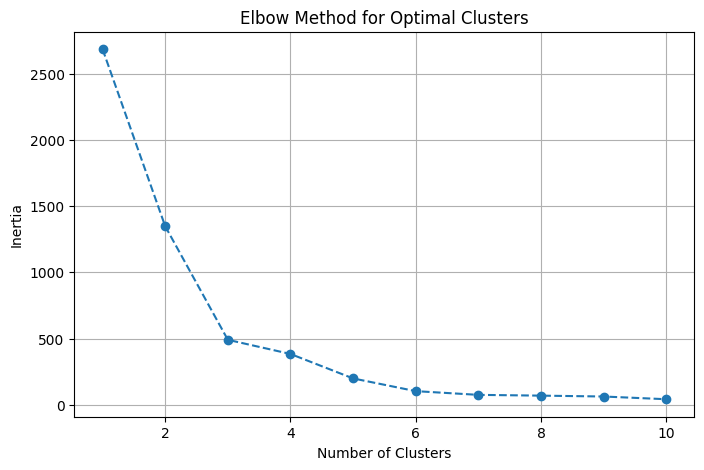

In [74]:
import matplotlib.pyplot as plt

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [75]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(clustering_data_scaled)

centroids = kmeans.cluster_centers_
print("Centroids (scaled):", centroids)


Centroids (scaled): [[ 0.97730469 -0.35626934]
 [ 0.04393338  2.78156214]
 [-0.73890248 -0.35916913]]


In [76]:
import plotly.express as px

centroids_rescaled = scaler.inverse_transform(centroids)

# Add cluster to the map
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="cluster",
                        hover_name="name", hover_data=["city", "state", "type"],
                        color_discrete_sequence=px.colors.qualitative.Set1,
                        zoom=4, height=600)

for i, (lat, lon) in enumerate(centroids_rescaled):
    fig.add_scattermapbox(
        lat=[lat], lon=[lon], mode='markers+text',
        marker=dict(size=15, color='black'),
        name=f"Centroid {i}",
        text=f"Cluster {i} Center",
        textposition="bottom center"
    )

fig.update_layout(mapbox_style="open-street-map",
                  mapbox_center={"lat": 20.5937, "lon": 78.9629},
                  title="K-Means Clustering of EV Charging Stations")
fig.show()


In [77]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
clustering_data = df[['latitude', 'longitude']]

scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)


In [78]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(clustering_data_scaled)

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters found: 2
Number of noise points: 4


In [79]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="dbscan_cluster",
                        hover_name="name", hover_data=["city", "state", "type"],
                        color_discrete_sequence=px.colors.qualitative.Plotly,
                        zoom=4, height=600)

fig.update_layout(mapbox_style="open-street-map",
                  mapbox_center={"lat": 20.5937, "lon": 78.9629},
                  title="DBSCAN Clustering of EV Charging Stations")
fig.show()
